<a href="https://colab.research.google.com/github/jay6-dev/Loan-Prediction-Model/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Salary (R)  Loan Chance (%)
0       20795        89.047281
1        5860       100.000000
2       81820        49.924995
3       59886        63.850989
4       11265        91.454171
Slope (m): -0.00
Intercept (c): 100.07
Predicted Loan Chance for a salary of R50000: 67.06%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


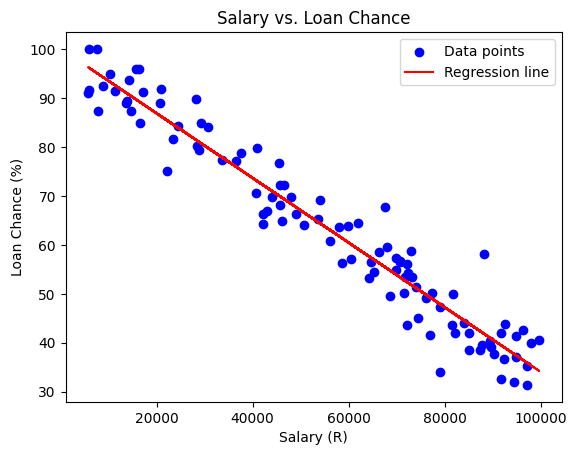

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_customers = 100
salaries = np.random.randint(5000, 100001, num_customers)  # Random salaries between R5,000 and R100,000

# Generate chance of taking a loan (higher chance with lower salary, lower chance with higher salary)
loan_chance = 100 - (salaries / 1500) + np.random.normal(0, 5, num_customers)
loan_chance = np.clip(loan_chance, 0, 100)  # Ensure the percentage stays within 0 to 100

# Create a DataFrame
data = pd.DataFrame({'Salary (R)': salaries, 'Loan Chance (%)': loan_chance})

# Display first few rows of the data
print(data.head())

# Step 3: Create the linear regression model
X = data[['Salary (R)']]  # Independent variable (Salary)
y = data['Loan Chance (%)']  # Dependent variable (Loan Chance)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the model coefficients
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")

# Step 4: Predict loan chance for a specific salary (e.g., R50,000)
salary_input = 50000
predicted_chance = model.predict([[salary_input]])
print(f"Predicted Loan Chance for a salary of R{salary_input}: {predicted_chance[0]:.2f}%")

# Step 5: Visualize the data and the regression line
plt.scatter(data['Salary (R)'], data['Loan Chance (%)'], color='blue', label='Data points')
plt.plot(data['Salary (R)'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Salary (R)')
plt.ylabel('Loan Chance (%)')
plt.title('Salary vs. Loan Chance')
plt.legend()
plt.show()
